In [122]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
# 레티나 디스플레이로 폰트가 선명하게 표시되도록 합니다.
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('retina')

# 라이브러리를 로드합니다.
import pandas as pd
import seaborn as sns

# 한글폰트를 설정합니다.
plt.rc('font',family='AppleGothic')
plt.rc('axes',unicode_minus=False)

In [123]:
iris = load_iris()
X = iris.data
y = iris.target

In [124]:
dt_clf = DecisionTreeClassifier(random_state=12)

In [125]:
kfold = KFold(n_splits=9, shuffle=False)
cv_index = kfold.split(X)

1번째 교차 검증 정확도 : 100.00%
2번째 교차 검증 정확도 : 100.00%
3번째 교차 검증 정확도 : 100.00%
4번째 교차 검증 정확도 : 100.00%
5번째 교차 검증 정확도 : 76.47%
6번째 교차 검증 정확도 : 100.00%
7번째 교차 검증 정확도 : 93.75%
8번째 교차 검증 정확도 : 87.50%
9번째 교차 검증 정확도 : 93.75%
-------------------------------------------
Cross Validation 정확도 평균: 94.61%


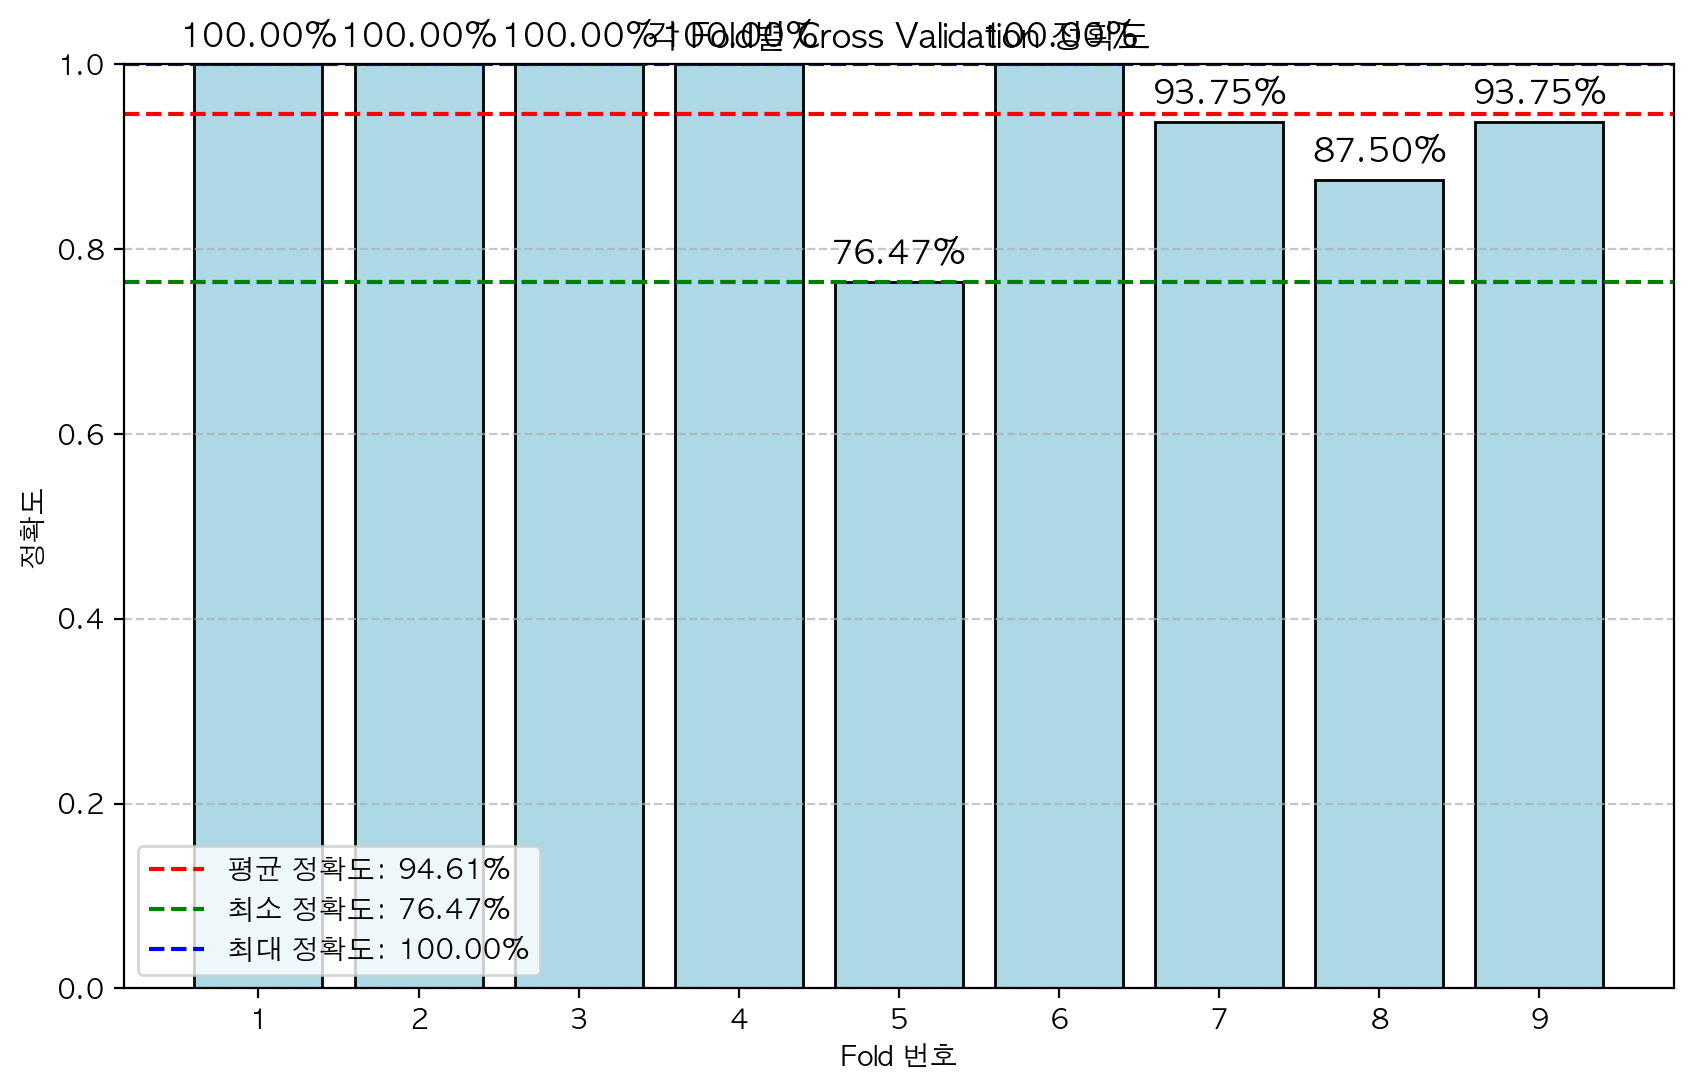

In [126]:
cv_accuracy = []
index = 1

for train_index, test_index in cv_index:
    X_train,X_test = X[train_index],X[test_index]
    y_train,y_test = y[train_index],y[test_index]
    
    dt_clf.fit(X_train,y_train)
    accuracy = dt_clf.score(X_test,y_test)
    
    print(f'{index}번째 교차 검증 정확도 : {accuracy:.2%}')
    cv_accuracy.append(accuracy)
    
    index += 1
    
print(f'''-------------------------------------------
Cross Validation 정확도 평균: {np.mean(cv_accuracy):.2%}''')

# 시각화 부분 추가
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(cv_accuracy) + 1), cv_accuracy, color='lightblue', edgecolor='black')
plt.ylim(0, 1)  # y축을 0에서 1 사이로 설정
plt.xlabel('Fold 번호')
plt.ylabel('정확도')
plt.title('각 Fold별 Cross Validation 정확도')
plt.xticks(range(1, len(cv_accuracy) + 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 정확도 값 라벨 표시
for i in range(len(cv_accuracy)):
    plt.text(i + 1, cv_accuracy[i] + 0.02, f'{cv_accuracy[i]:.2%}', ha='center', fontsize=12)

# 평균선 그리기
mean_accuracy = np.mean(cv_accuracy)
plt.axhline(y=mean_accuracy, color='r', linestyle='--', label=f'평균 정확도: {mean_accuracy:.2%}')

# 최소값과 최대값 선 추가
min_accuracy = np.min(cv_accuracy)
max_accuracy = np.max(cv_accuracy)
plt.axhline(y=min_accuracy, color='g', linestyle='--', label=f'최소 정확도: {min_accuracy:.2%}')
plt.axhline(y=max_accuracy, color='b', linestyle='--', label=f'최대 정확도: {max_accuracy:.2%}')

# 범례 추가
plt.legend()

plt.show()